# Data project - An analysis of the Phillips curve and ECB's quantitative easing

In our project we are investigating whether the Phillips Curve and the associated negative relationship between inflation and unemployment is applicable to the world nowadays. We are collecting yearly rates of inflation and unemployment from the World Bank from 1991 to 2017 for selected countries. We're constructing two groups of countries: one group with selected countries from the Eurozone (and Denmark who has its currency pegged to the euro) and another group of selected developed countries who does not have the euro as their currency. 

As the European Central Bank in 2015 imposed quantitative easing, we will analyse the effect of this monetary policy on the group of countries inside the eurozone by comparing them to the group of countries outside the eurozone - both for the full period from our sample (1991 to 2017) and for the period efter the implementation of the programme (2015 to 2017).

Our project includes a part with descriptive analysis and some associated plots to illustrate the most important statistical figures for our data and the development over time for inflation and unemployment rates. Afterwards we will perform a panel data regression analysis to investigate whether there has been a negative relationship between inflation and unemployment after the quantitative easing programme started in 2015. 

**Importing packages**

In [1]:
import pandas as pd
#pip install linearmodels #Run in terminal
from linearmodels import PanelOLS 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas_datareader
from pandas_datareader import wb

import scipy.stats  as stats
from scipy.stats.stats import pearsonr

import ipywidgets as widgets
from ipywidgets import interactive

**1. Downloading inflation and unemployment data from World bank**

We need to download the inflation and unemployment data from the World Bank. We first define the two different groups of countries that we want to include in our analysis. We choose a number of eurozone countries that have been affected by the Quantitave Easing of the ECB as the first group, and choose a number of developed world comparable countries as a form of control group. When we have defined these countries, we download inflation and unemployment data for all countries in the period 1991 to 2017 and print this data to get an overview of how data is collected. We have left out countries that have had very high levels of either inflation or unemployment through the chosen time period to not skew the analysis.

In [2]:
#Making country subsets
cntr_eu = ['DK','FR','NL','DE','BE', 'LU', 'AT', 'FI', 'IT', 'MT', 'CY'] 
cntr_other = ['CA','CH','AU','NZ','SG','NO','US', 'JP', 'KR'] 

#Downloading inflation and unemployment data for each subset, 'FP.CPI.TOTL.ZG' is inflation, 'SL.UEM.TOTL.ZS' is unemployment
data_eu = wb.download(indicator=['FP.CPI.TOTL.ZG','SL.UEM.TOTL.ZS'], country=cntr_eu, start=1991, end=2017) 
data_other = wb.download(indicator=['FP.CPI.TOTL.ZG','SL.UEM.TOTL.ZS'], country=cntr_other, start=1991, end=2017)

#Print dataframes to get an overview of how data is collected
print(data_eu)
print(data_other)

                  FP.CPI.TOTL.ZG  SL.UEM.TOTL.ZS
country     year                                
Austria     2017        2.081269           5.499
            2016        0.891592           6.014
            2015        0.896565           5.723
            2014        1.605804           5.620
            2013        2.000159           5.335
            2012        2.485674           4.865
            2011        3.286582           4.564
            2010        1.813536           4.820
            2009        0.506308           5.301
            2008        3.215950           4.128
            2007        2.168556           4.858
            2006        1.441547           5.243
            2005        2.299139           5.628
            2004        2.061204           5.834
            2003        1.355557           4.779
            2002        1.810360           4.849
            2001        2.649999           4.007
            2000        2.344865           4.687
            1999    

We see that country and year is set as an index, and inflation and unemployment are named their indicator name, which is not suitable for the further analysis. Other than that, it seems like the data was downloaded correctly. We quickly check if there are any missing values in the data frame before moving on to the data structuring. 

In [3]:
print(data_eu.isnull().values.any(),data_other.isnull().values.any())

False False


We see that this is not the case, so we move on with our data structuring without having to take any missing values into account.

**2. Data structuring**

To now sort, name and modify the data for our further analysis. Additionally we create two further subsets containing all data from or after 2015, when the QE programme started, which we will later compare and analyze further. 

In [4]:
#Combine and sort data from eurozone
data_eu = data_eu.reset_index() # Resetting index so "Year" can be treated as a variable instead of index
data_eu.columns = ['country', 'year', 'inflation','unemployment'] #Naming the coloumns
data_eu.year = data_eu.year.astype(int) #Turning the years into integers

#Combine and sort data from other countries
data_other = data_other.reset_index() # Resetting index so "Year" can be treated as a variable instead of index
data_other.columns = ['country', 'year', 'inflation','unemployment'] #Naming the coloumns
data_other.year = data_other.year.astype(int) #Turning the years into integers

#Making subset for when Quantative Easing was in effect
after_QE = data_eu[data_eu['year']>=2015]
after_QE_other = data_other[data_other['year']>=2015]

**3. Data description**

Now, to get an overview of our data, we start by creating a table with main attritbutes of the data for inflation and unemployment for the chosen eurozone-countries. 

In [5]:
#Calculating mean, min and max for each country
mean_infl_eu = data_eu.groupby("country")['inflation'].mean()
min_infl_eu = data_eu.groupby("country")['inflation'].min()
max_infl_eu = data_eu.groupby("country")['inflation'].max()
mean_unem_eu = data_eu.groupby("country")['unemployment'].mean()
min_unem_eu = data_eu.groupby("country")['unemployment'].min()
max_unem_eu = data_eu.groupby("country")['unemployment'].max()

#Creating the table, adding headlines and displaying
tabel1 = pd.concat([mean_infl_eu, min_infl_eu, max_infl_eu, mean_unem_eu, min_unem_eu, max_unem_eu], axis=1)
tabel1.columns = ['Average inflation', 'Mininum inflation', 'Maximum inflation', 'Average unemployment', 'Minimum unemployment', 'Maximum unemployment']
pd.options.display.float_format = '{:,.2f}%'.format
tabel1

,Average inflation,Mininum inflation,Maximum inflation,Average unemployment,Minimum unemployment,Maximum unemployment
country,,,,,,
Austria,2.07%,0.51%,4.02%,4.87%,3.42%,6.01%
Belgium,2.00%,-0.05%,4.49%,7.93%,6.18%,9.65%
Cyprus,2.40%,-2.10%,6.51%,6.40%,2.04%,16.09%
Denmark,1.86%,0.25%,3.42%,6.15%,3.43%,10.72%
Finland,1.61%,-0.21%,4.31%,10.41%,6.37%,17.00%
France,1.52%,0.04%,3.21%,9.86%,7.06%,12.59%
Germany,1.81%,0.31%,5.06%,7.57%,3.75%,11.17%
Italy,2.51%,-0.09%,6.25%,9.95%,6.07%,12.68%
Luxembourg,2.04%,0.29%,3.59%,3.96%,1.48%,6.67%


We see from this table that all the countries have an average inflation of about 1,5% to 2%, which is also around the goals set by the ECB for long-run inflation. We see that all countries have also experienced very low levels of inflation at some point during the period having inflation levels around zero and even in some cases deflation. The inflation levels have only in the case of Italy and the Cyprus risen much above 4%, whereas other countries have capped it at around this level. 

The unemployment rates seem to be a bit more varying from country to country, with average number ranging from 3,96% in Luxembourg to 10,41% in Finland. Without being able to conclude on anything solely based on these numbers, when speaking of the Phillips curve it is however interesting to see - at least for these countries - that the countries with the lowest average inflation - Finland and France - are also the countries with the highest average unemployment. This could indicate some negative correlation, though many other aspects could play into part here. We will look further into this relationship later.

First we will have a look at how the numbers from our control group compares:

In [6]:
#Calculating mean, min and max for each country
mean_infl_other = data_other.groupby("country")['inflation'].mean()
min_infl_other = data_other.groupby("country")['inflation'].min()
max_infl_other = data_other.groupby("country")['inflation'].max()
mean_unem_other = data_other.groupby("country")['unemployment'].mean()
min_unem_other = data_other.groupby("country")['unemployment'].min()
max_unem_other = data_other.groupby("country")['unemployment'].max()

#Creating the table, adding headlines and displaying
tabel2 = pd.concat([mean_infl_other, min_infl_other, max_infl_other, mean_unem_other, min_unem_other, max_unem_other], axis=1)
tabel2.columns = ['Average inflation', 'Mininum inflation', 'Maximum inflation', 'Average unemployment', 'Minimum unemployment', 'Maximum unemployment']
tabel2

,Average inflation,Mininum inflation,Maximum inflation,Average unemployment,Minimum unemployment,Maximum unemployment
country,,,,,,
Australia,2.48%,0.22%,4.63%,6.67%,4.23%,10.87%
Canada,1.91%,0.17%,5.63%,7.94%,6.04%,11.38%
Japan,0.36%,-1.35%,3.25%,3.92%,2.10%,5.40%
"Korea, Rep.",3.53%,0.71%,9.33%,3.50%,2.05%,6.96%
New Zealand,2.01%,-0.11%,4.03%,6.23%,3.66%,10.67%
Norway,2.12%,0.45%,3.75%,4.12%,2.49%,6.31%
Singapore,1.72%,-0.53%,6.63%,4.03%,2.18%,5.93%
Switzerland,0.98%,-1.14%,5.86%,3.85%,1.78%,4.92%
United States,2.36%,-0.36%,4.23%,6.01%,3.99%,9.63%


With these non-eurozone developed countries we see some of the same attributes as for the eurozone-countries. The means of the inflation varies a bit more - maybe simply due to the fact that they don't have the follow the specified inflation goals of the ECB. The maximum and minimum inflations are however rather stable, with more countries having shown some degree of deflation at some point though. The unemployment rates are also quite similar to that of the eurozone-countries, but these non-eurozone countries in general doesn't have as high unemployment rates as the highest unemployment rates of the eurozone-countries. 

However, all in all the two groups seem pretty similar on both accounts and we will therefore justify a further comparison of these two groups with the non-eurozone countries acting as a sort of control group. 

**4. Data development**

To now have a look at how the inflation and unemployment of the different countries have developed over time, we plot some graphs of the development of each variable over time. 

We start by having a look at the inflation level of the eurozone-countries, which is plotted below.

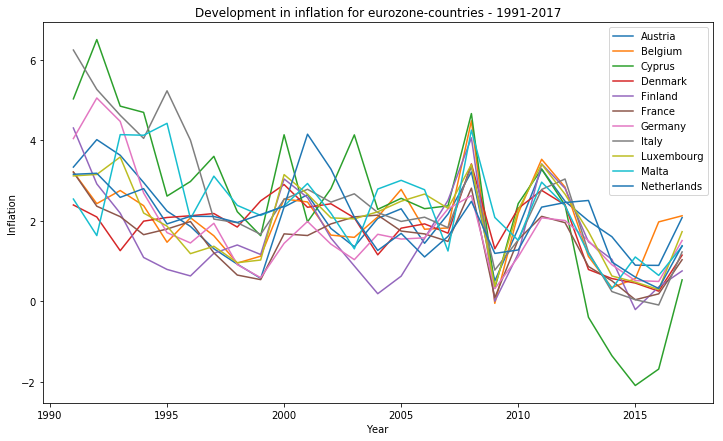

In [7]:
#Development in inflation over time - EU countries
data_eu.set_index('year').groupby('country')['inflation'].plot(legend=True, figsize=(12,7))
plt.title("Development in inflation for eurozone-countries - 1991-2017")
plt.xlabel("Year")
plt.ylabel("Inflation")
plt.show()

Looking at the inflation for the eurozone-countries, we see that inflation seems to be very highly correlated between the different countries with big changes in inflation happening simultaneously in many of the countries - especially after the financial crisis. Looking at the post-2015 years it also seems like there have been a collective shift upwards in the inflation rate - maybe due to the effects of QE. All in all, it is very clear that the countries are closely intertwined when looking at their inflation rates. 

Now to have a look at their unemployment rates:

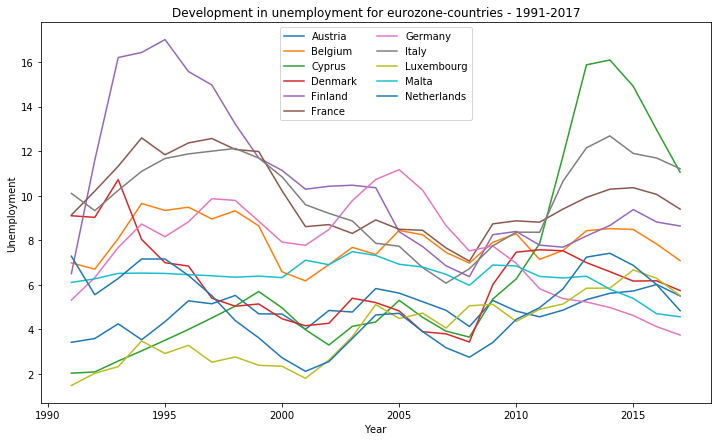

In [8]:
#Development in unemployment over time - eu countries
data_eu.set_index('year').groupby('country')['unemployment'].plot(legend=True, figsize=(12,7))
plt.title("Development in unemployment for eurozone-countries - 1991-2017")
plt.xlabel("Year")
plt.ylabel("Unemployment")
plt.legend(ncol=2, loc='upper center')
plt.show()

As also concluded from the data we saw earlier, the unemployment rates of the eurozone-countries seem to vary a bit more than the inflation rates. It is still clear that there are some comovements however, but it seems that the structural unemployment rates simply are different across the different countries. However, it seems like there is some degree of convergence in the sense that the span which the different unemployment rates have is smaller for recent years than for the earlier years in the data set. Interestingly, we see that all countries have also seen a drop in unemployment after 2015, which is in the same period we saw a sharp increase in the inflation rate of the countries. 

Now to have a quick look at how the inflation rate and unemployment rates of the control group has developed:

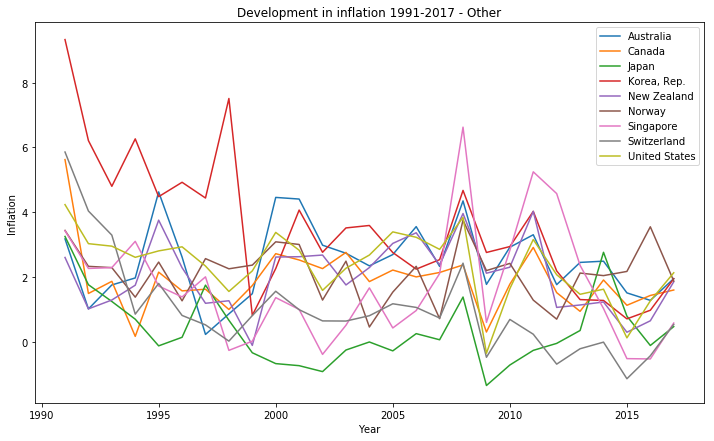

In [9]:
#Development in inflation over time - other countries
data_other.set_index('year').groupby('country')['inflation'].plot(legend=True, figsize=(12,7))
plt.title("Development in inflation 1991-2017 - Other")
plt.xlabel("Year")
plt.ylabel("Inflation")
plt.show()

It is clear from the graph above, that the countries in this group are now nearly as similar when it comes to development in inflation. It seems that they very more in their general level of inflation and also doesn't necessarily react to the same shocks - which probably is due to the fact that their economies might not be as intertwined as they are spread all over the world. However, it seems that inflation for every country but Norway has been increasing since 2015, which could question whether it was actually the QE-programme sparking inflation in the eurozone-countries and not just a general trend also visible in the eurozone-data. 

Finally, we will look at the data for unemployment for the non-eurozone countries.

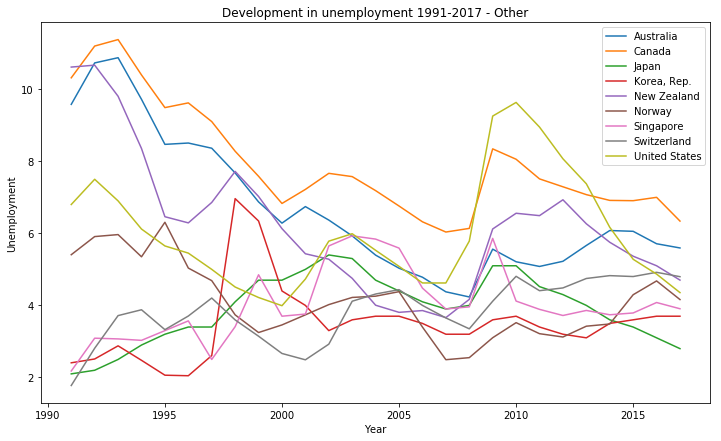

In [10]:
#Development in unemployment over time - other countries
data_other.set_index('year').groupby('country')['unemployment'].plot(legend=True, figsize=(12,7))
plt.title("Development in unemployment 1991-2017 - Other")
plt.xlabel("Year")
plt.ylabel("Unemployment")
plt.show()

Once again we see a bit more variation in this development than the same of the eurozone-countries with some countries having way larger hikes and drops in the rate than others, which we don't really see in the data for the eurozone-countries in recent years. Once again we see that unemployment rates have been falling for most countries over recent years, but not necessarily a fall that started in 2015 as with most of the eurozone-countries. 

**5. Data analysis - The Phillips Curve**

Having a feeling of the general development in the data, we will now look at how the empirical long-run Phillips curves have in fact looked over the years and see if we can conclude anything from this. We start this analysis by plotting the long-run Phillips curves for the eurozone-countries. We plot the graphs, where the individual country's long run Phillips Curve can be chosen from a drop-down menu. This yields:

In [11]:
#Define items as a list of the different countries
items = sorted(data_eu['country'].unique().tolist())

#define function that plots graph for chosen country
def view(Country=''):
    df = data_eu[data_eu['country']==Country]
    return df.set_index('year').plot(x='unemployment',y='inflation',legend=False, title='Long run Phillips Curve for '+Country, 
                                     color='Red', figsize=(10,5))

#Plot interactive graph with items as dropdown menu 
w = widgets.Select(options=items)
interactive(view, Country=w)

interactive(children=(Select(description='Country', options=('Austria', 'Belgium', 'Cyprus', 'Denmark', 'Finla…

We see from these graphs that there for the most part definitely isn't a clear long run negative relationship between unemployment and inflation. For some countries such as Austra there might be an indication that they are somewhat negatively affected, but on the other hand when looking at a country like the UK you could get the completely different impression. 

We will breifly look at the long-run Phillips curves for the non-eurozone countries, which are plotted below.

In [12]:
#Define items_other as list of different non-EU countries
items_other = sorted(data_other['country'].unique().tolist())
 
#Define function that plots graph for chosen country
def view_other(Country=''):
    df_other = data_other[data_other['country']==Country]
    return df_other.set_index('year').plot(x='unemployment',y='inflation',legend=False,
                                           title='Long run Phillips Curve for '+Country, color='Red', figsize=(10,5))

#Plot interactive graph with items_other as dropdown menu
w_other = widgets.Select(options=items_other)
interactive(view_other, Country=w_other)

interactive(children=(Select(description='Country', options=('Australia', 'Canada', 'Japan', 'Korea, Rep.', 'N…

These graphs show the overall conclusion from the previous case once again; that there is no clear correlation between unemployment and inflation in the long run. Once again we see some countries that could indicate some correlation over time such as Japan and Switzerland,  but even these countries have also experienced years where both had been rising in some mild form of stagflation, that every country seem to have experienced to some degree over the period in question. 

All in all, we must conclude that there is no evident correlation across countries between unemployment and inflation in the long run, which is also what the consensus is when talking about the Phillips curve. Many still argue that there exists a short term trade-off between inflation and unemployment and that the Phillips curve should exist in the short run. One interesting case to study in this regard is the Quantitative Easing programme of the ECB, as one of the direct goals of this initiative was to boost the eurozone-economies as well as see a rise in inflation - thus goal directly based on the idea of a short run Phillips curve. 

To investigate this further we will look at the data solely from 2015 and onwards. Of course this would've been more interesting if we had more data since the beginning of the QE, but hopefully this will at least give us an idea of whether it has had the desired (or any) effect - maybe without being able to draw any final conclusions. 

In [13]:
#Define function that plots graph for chosen country
def view_QE(Country=''):
    df_QE = after_QE[after_QE['country']==Country]
    return df_QE.set_index('year').plot(x='unemployment',y='inflation',legend=False,
                                           title='Short run Phillips Curve for '+Country, color='Blue', figsize=(10,5))

#Plot interactive graph with dropdown menu
interactive(view_QE, Country=w)

interactive(children=(Select(description='Country', options=('Austria', 'Belgium', 'Cyprus', 'Denmark', 'Finla…

From these graphs we can see that basically all the countries have had a downwards sloping Phillips curve over the past three years after the QE started. Once again we can't conclude on any generality in these graphs due to the low number of observations, but it is however interesting that we see this trend over so many countries. Also, whether this is due to the QE of the ECB, a number of other factors or a combination is of course not possible to tell either. 

Seeing whether we see any difference, we now look at the graphs of our control group.

In [14]:
#Define function that plots graph for chosen country
def view_QE_other(Country=''):
    df_QE_other = after_QE_other[after_QE_other['country']==Country]
    return df_QE_other.set_index('year').plot(x='unemployment',y='inflation',legend=False,
                                           title='Short run Phillips Curve for '+Country, color='Blue', figsize=(10,5))

#Plot interactive graph with dropdown menu
interactive(view_QE_other, Country=w_other)

interactive(children=(Select(description='Country', options=('Australia', 'Canada', 'Japan', 'Korea, Rep.', 'N…

From these graphs we get a much more varied view of the Phillips curves. Some countries such as New Zealand and the US show similar trends, but interestingly, other countries such as specifically Norway show a completely different positive correlation between unemployment and inflation. Thus, there seems to be at least some degree to which the short run Phillips curve have worked as expected in the eurozone countries after the QE, whereas it doesnt necessarily look the same in non-eurozone countries - maybe due to the lack of QE... 

**6. Panel data regression analysis**

Finally we will now look at some panel data regressions to see how these results reflect what we have seen from our graphical analysis so far. We use panel data regression and taking into account fixed effects of each country, so that this doesn't skew our results due to some countries having higher inflation and unemployment rates than others. First we look at the panel data regression for the full sample of eurozone countries:

In [15]:
#Panel data regression for full sample
data_eu1 = data_eu.reset_index()
year_full = pd.Categorical(data_eu1.year)
data_eu1 = data_eu1.set_index(['country','year'])
data_eu1['year']=year_full
regression1=PanelOLS(data_eu1.inflation, data_eu1.unemployment, entity_effects=True)
res1 = regression1.fit(cov_type='clustered', cluster_entity=True)
print(res1)

                          PanelOLS Estimation Summary                           
Dep. Variable:              inflation   R-squared:                        0.1583
Estimator:                   PanelOLS   R-squared (Between):             -2.2210
No. Observations:                 297   R-squared (Within):               0.1583
Date:                Sun, May 26 2019   R-squared (Overall):             -1.6233
Time:                        15:04:39   Log-likelihood                   -445.19
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      53.616
Entities:                          11   P-value                           0.0000
Avg Obs:                       27.000   Distribution:                   F(1,285)
Min Obs:                       27.000                                           
Max Obs:                       27.000   F-statistic (robust):             8.6633
                            

Interestingly, we find that there actually is a significant negative relationship between inflation and unemployment in the entire sample, though it is rather small. This might simply be due to the fact that the countries might have structurally changed over the years, maybe having lower structural rates of unemployment today than in 1991. Exactly why we get these results are beyond the scope of this project however.

Even though we have a very low number of observations and the results might not be very robust or trustworthy, we will now look at a panel data regression for the eurozone countries after the QE. This gives:

In [16]:
# Panel data regression for data after QE
after_QE1 = after_QE.reset_index()
year_QE = pd.Categorical(after_QE1.year)
after_QE1 = after_QE.set_index(['country','year'])
after_QE1['year']=year_QE
regression2=PanelOLS(after_QE1.inflation, after_QE1.unemployment, entity_effects=True)
res2 = regression2.fit(cov_type='clustered', cluster_entity=True)
print(res2)

                          PanelOLS Estimation Summary                           
Dep. Variable:              inflation   R-squared:                        0.6564
Estimator:                   PanelOLS   R-squared (Between):             -52.947
No. Observations:                  33   R-squared (Within):               0.6564
Date:                Sun, May 26 2019   R-squared (Overall):             -36.823
Time:                        15:04:40   Log-likelihood                   -12.163
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      40.123
Entities:                          11   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                    F(1,21)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             70.644
                            

Once again we get a very significant and even more negative value of the estimate, which our graphical analysis also indicated. The exact value of this parameter, however, is probably not very precise due to the foundation of this regression, but indicates that the inflation in general has been rising by 0.76 percentage points every time unemployment have been falling by 1 percentage point. Extrapolating this answer into a general relationship is not possible of course, but it is interesting nevertheless. 

Finally, just to compare this result with that of the the non-eurozone countries, we do a panel data regression on the data for non-eurozone countries as well:

In [17]:
# Panel data regression for data after QE for non-eurozone countries
after_QE_other1 = after_QE_other.reset_index()
year_QE_other = pd.Categorical(after_QE_other.year)
after_QE_other1 = after_QE_other.set_index(['country','year'])
after_QE_other1['year']=year_QE_other
regression3=PanelOLS(after_QE_other1.inflation, after_QE_other1.unemployment, entity_effects=True)
res3 = regression3.fit(cov_type='clustered', cluster_entity=True)
print(res3)

                          PanelOLS Estimation Summary                           
Dep. Variable:              inflation   R-squared:                        0.0900
Estimator:                   PanelOLS   R-squared (Between):             -12.366
No. Observations:                  27   R-squared (Within):               0.0900
Date:                Sun, May 26 2019   R-squared (Overall):             -10.302
Time:                        15:04:41   Log-likelihood                   -21.932
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.6809
Entities:                           9   P-value                           0.2121
Avg Obs:                       3.0000   Distribution:                    F(1,17)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             1.1858
                            

Here we get a parameter that is also negative and about the same size, which alone is interesting, however this result is not significant, and also underlines the very varying results we saw in the graphical analysis. Again, this could be a sign of something different that had happened in the eurozone countries - which very well might have been the QE. 

**7. Conclusion**

Throughout this data project we have analyzed the inflation and unemployment and how they have developed for selected developed countries. We divided our country sample into a group consisting of countries from the eurozone and a group of similar developed countries. The goal of this project was to analyze whether there is in a fact a trade-off between inflation and unemployment as originally proposed by the Phillips curve. 

After structuring the data, we investigated the variables graphically. The development in inflation and unemployment was somewhat similar for all of the selected countries, but the countries from the eurozone were clearly more correlated than the non-eurozone countries - especially when looking at inflation.

Plotting the long run Phillips curve showed us no clear graphical correlation between the two variables for any of the countries, and there was no clear systematic differences between the eurozone countries and the other selected countries. On the other hand, we found significance in the results when we did an OLS-regression of the data for the full period for the eurozone, which could indicate some structural changes that has happened over the period in question.

Looking at the short run Phillips curve since 2015, the graphical inspection gave us some interesting results. Here we generally saw downards sloping Phillips curves for the eurozone countries but not for most of the other countries. This could indicate that there has been different factors affecting the countries inside and outside the eurozone - where one of these factors very well could be the quantitative easing program of the ECB. It is however a very short period to look at, so we cant necessarily conclude this for sure. We saw similar results when doing an OLS-regression of the data, giving us a siginificant negative relationship between unemployment and inflation for the eurozone countries, but insignificant results for the non-eurozone countries. 

